In [6]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
datos1=pd.read_excel('datos_cuentas1.xlsx')
df=datos1[['riesgo','score_buro','porc_eng','limite_credito']]


,riesgo,score_buro,porc_eng,limite_credito
0,0.00,0,40.02,5000
1,0.00,0,35.01,6000
2,0.00,0,25.01,0
3,0.00,0,25.01,7000
4,0.00,0,25.01,7000
...,...,...,...,...
22730,27.40,469,8.87,10000
22731,19.00,502,29.49,5000
22732,26.65,459,23.76,4750
22733,-17.35,699,28.56,7000


<Axes: >

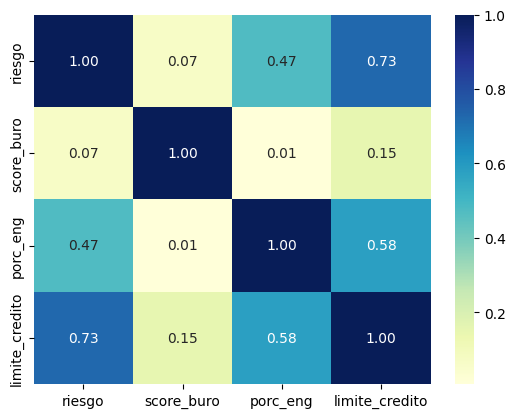

In [15]:
Corr_Factors=df.corr()
Corr_Factors

Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

In [27]:
Vars_Indep= df[['riesgo']]
Var_Dep= df['limite_credito']

In [61]:
x=Vars_Indep
y=Var_Dep
x1=Vars_Indep
y1=df['porc_eng']
x2=Vars_Indep
y2=df['score_buro']

1 modelo: regresión cuadrática

In [29]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [30]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['riesgo'], df['limite_credito'])
parametros

array([ 4.15744679e-01, -9.06806843e+01,  6.25509822e+03])

In [31]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['riesgo'], df['limite_credito'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

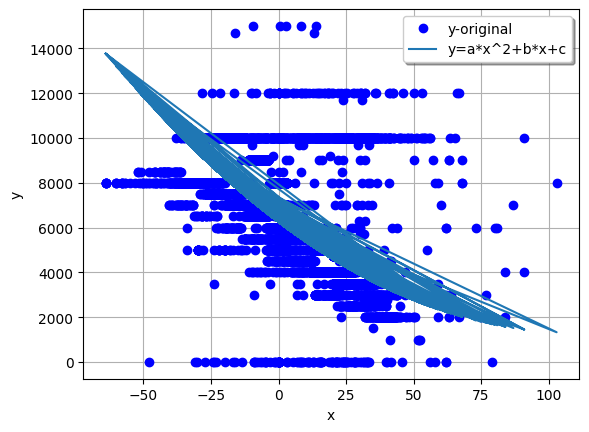

In [33]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [34]:
R2 = r2_score(y, yfit1) 
R2

0.5337900635813616

2 modelo:exponencial

In [35]:
def func2(x, a, b, c):
    return a*np.exp(b*x)+c

In [36]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['riesgo'], df['limite_credito'])

In [37]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-1.34603208e-15,  1.00000000e+00,  2.46034071e+17])

In [38]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['riesgo'], df['limite_credito'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

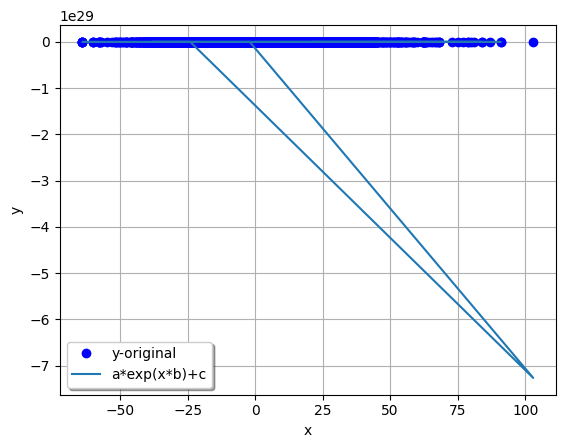

In [39]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [48]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit2) 
R2

-5.086073877793743e+48

3 modelo:riesgo vs porc enganche en cuadrática

In [41]:
def  func3 (x, a, b, c):
     return a*x**2 + b*x + c

In [42]:
#Ajustamos los parámetros de la función curve_fit
parametros3, covs3= curve_fit(func3, df['riesgo'], df['porc_eng'])

In [43]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros3

array([ 4.15744679e-01, -9.06806843e+01,  6.25509822e+03])

In [51]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros3, _ = curve_fit(func3, df['riesgo'], df['porc_eng'])
a3, b3, c3 = parametros3[ 0 ], parametros3[ 1 ], parametros3[ 2 ]
yfit3 = a3 * x ** 2 + b3 * x + c3

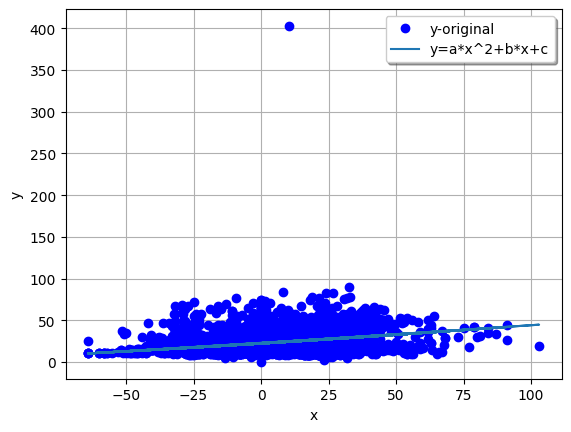

In [52]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x1, y1, 'bo', label="y-original")
plt.plot(x1, yfit3, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [53]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit3) 
R2

-7.614511616295326

4 modelo: exponencial con porc_eng

In [49]:
def func4(x, a, b, c):
    return a*np.exp(b*x)+c

In [50]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4, df['riesgo'], df['porc_eng'])

In [55]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros4, _ = curve_fit(func4, df['riesgo'], df['porc_eng'])
a4, b4, c4 = parametros4[ 0 ], parametros4[ 1 ], parametros4[ 2 ]
yfit4 = a4*np.exp(x*b4)+c4

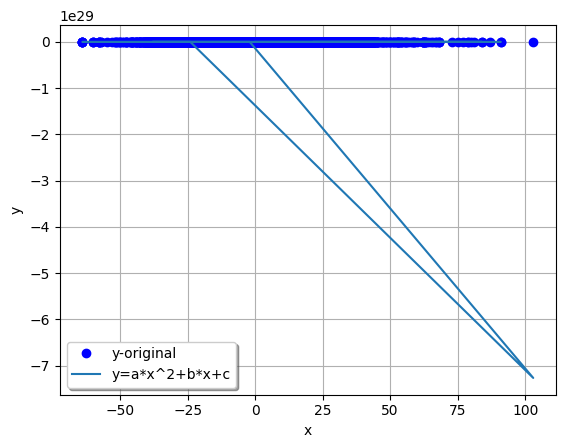

In [56]:
plt.plot(x1, y1, 'bo', label="y-original")
plt.plot(x1, yfit4, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [57]:
R2 = r2_score(y, yfit4) 
R2

-5.086073877793743e+48

5 modelo: cuadrática con score_buro

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [59]:
#Ajustamos los parámetros de la función curve_fit
parametros5, covs5= curve_fit(func1, df['riesgo'], df['score_buro'])

In [60]:
parametros5, _ = curve_fit(func1, df['riesgo'], df['score_buro'])
a5, b5, c5 = parametros5[ 0 ], parametros5[ 1 ], parametros5[ 2 ]
yfit5 = a5 * x ** 2 + b5 * x + c5

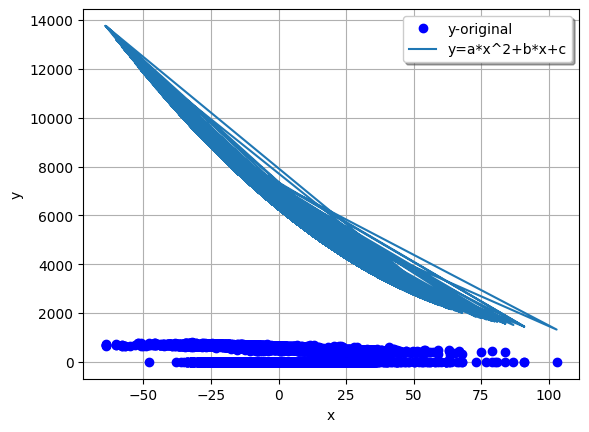

In [62]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x2, y2, 'bo', label="y-original")
plt.plot(x2, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [63]:

R2 = r2_score(y, yfit5) 
R2

-6.924606773893316